 # Allen Brain Atlas Aging Human Brain Tissue-Demetia-TBI (RNA-Seq)

 Author: Moshe Silverstein <br/>
 Date: 03-2018 <br/>
 Data Source Home: http://www.brain-map.org/ <br/>
 Data Source Download: http://aging.brain-map.org/download/index

 Reviewer: Charles Dai <br>
 Updated: 6-20

In [1]:
# appyter init
from appyter import magic
magic.init(lambda _=globals: _())

In [2]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import utility_functions as uf
import lookup

In [3]:
# from clustergrammer_widget import *
# net = Network(clustergrammer_widget)

In [4]:
%load_ext autoreload
%autoreload 2

 ### Python Version

In [5]:
sys.version

'3.8.0 (default, Oct 28 2019, 16:14:01) \n[GCC 8.3.0]'

 # Initialization

 ### Load Mapping Dictionaries

In [6]:
symbol_lookup, geneid_lookup = lookup.get_lookups()

Gathering sources: 100%|██████████| 3/3 [00:10<00:00,  3.53s/it]


 ### Output Path

In [7]:
output_name = 'aba_ahb-dementia'

path = 'Output/ABA-AHB-DEMENTIA'
if not os.path.exists(path):
    os.makedirs(path)

In [8]:
%%appyter hide_code
{% do SectionField(
    name='data',
    title='Load Data',
    subtitle='Upload files from the Developing Human Brain Sample (microarray) data set. Link: http://www.brainspan.org/static/download.html',
) %}

 # Load Data

In [9]:
%%appyter code_exec

matrix = pd.read_csv({{FileField(
    constraint='.*\.csv$',
    name='expression_matrix', 
    label='Expression Matrix', 
    default='Input/ABA-AHB-DEMENTIA/gene_expression_matrix_2016-03-03/fpkm_table_normalized.csv',
    section='data')
}}, index_col=0)

```python

matrix = pd.read_csv('Input/ABA-AHB-DEMENTIA/gene_expression_matrix_2016-03-03/fpkm_table_normalized.csv', index_col=0)
```

In [10]:
matrix.head()

0667  \
gene_id \ rnaseq_profile_id                                               
499304660                     0.000000   0.316875   0.250307   0.000000   
499304661                     4.831699   4.727912   4.645094   5.664388   
499304662                     0.000000   0.000000   0.000000   0.000000   
499304663                     0.000000   0.000000   0.000000   0.000000   
499304664                     0.040766   0.044743   0.119941   0.114818   

                             496100669  496100670  496100671  496100672  
gene_id \ rnaseq_profile_id                                              
499304660                     0.000000   0.126133   0.000000    0.00000  
499304661                     8.329654   5.712798   4.639818    4.70802  
499304662                     0.000000   0.000000   0.000000    0.00000  
499304663                     0.000000   0.000000   0.000000    0.00000  
499304664                     0.143532   0.000000   0.075834    0.00000  

[5 rows x 377 columns]

In [11]:
matrix.shape

(50281, 377)

 ## Load Sample Metadata

In [12]:
%%appyter code_exec

sample_meta = pd.read_csv({{FileField(
    constraint='.*\.csv$',
    name='columns_metadata', 
    label='Sample Metadata', 
    default='Input/ABA-AHB-DEMENTIA/gene_expression_matrix_2016-03-03/columns-samples.csv',
    section='data')
}}, index_col=0)

```python

sample_meta = pd.read_csv('Input/ABA-AHB-DEMENTIA/gene_expression_matrix_2016-03-03/columns-samples.csv', index_col=0)
```

In [13]:
sample_meta.head()

10557               FWM   
496100278            320630834   310790571         10557               FWM   
496100279            320630838   310790522         10235               TCx   
496100281            320630842   310790372         10294               HIP   

                  structure_color                       structure_name  \
rnaseq_profile_id                                                        
488395315                 #ebbfd0                   temporal neocortex   
496100277                 #f2f1f0            white matter of forebrain   
496100278                 #f2f1f0            white matter of forebrain   
496100279                 #ebbfd0                   temporal neocortex   
496100281                 #bfb5d5  hippocampus (hippocampal formation)   

                  hemisphere  
rnaseq_profile_id             
488395315               left  
496100277              right  
496100278               left  
496100279               left  
496100281              right

In [14]:
sample_meta.shape

(377, 11)

 ## Load Donor Metadata

In [15]:
%%appyter code_exec

donor_meta = pd.read_csv({{FileField(
    constraint='.*\.csv$',
    name='donor_metadata', 
    label='Donor Metadata', 
    default='Input/ABA-AHB-DEMENTIA/DonorInformation.csv',
    section='data')
}}, index_col=0)

```python

donor_meta = pd.read_csv('Input/ABA-AHB-DEMENTIA/DonorInformation.csv', index_col=0)
```

In [16]:
donor_meta.head()

Vascular           25   
467056391               No Dementia           52   
309335447  Alzheimer's Disease Type           28   

                  nincds_arda_diagnosis ever_tbi_w_loc   race      hispanic  \
donor_id                                                                      
326765665                   No Dementia              N  White  Not Hispanic   
326765656                   No Dementia              Y  White  Not Hispanic   
326765654        Dementia, Type Unknown              Y  White  Not Hispanic   
467056391                   No Dementia              Y  White  Not Hispanic   
309335447  Possible Alzheimer'S Disease              N  White  Not Hispanic   

          act_demented  braak  nia_reagan  
donor_id                                   
326765665  No Dementia      1           1  
326765656  No Dementia      5           2  
326765654     Dementia      4           2  
467056391  No Dementia      4           0  
309335447     Dementia      4           2

In [17]:
donor_meta.shape

(107, 18)

 ## Load Gene Metadata

In [18]:
%%appyter code_exec

gene_meta = pd.read_csv({{FileField(
    constraint='.*\.csv$',
    name='gene_metadata', 
    label='Gene Metadata', 
    default='Input/ABA-AHB-DEMENTIA/gene_expression_matrix_2016-03-03/rows-genes.csv',
    section='data')
}}, index_col=0)

```python

gene_meta = pd.read_csv('Input/ABA-AHB-DEMENTIA/gene_expression_matrix_2016-03-03/rows-genes.csv', index_col=0)
```

In [19]:
gene_meta.head()

chromosome  gene_entrez_id gene_symbol  \
gene_id                                            
499304660          1       100287102     DDX11L1   
499304661          1          653635      WASH7P   
499304662          1       102466751   MIR6859-1   
499304663          1       100302278   MIR1302-2   
499304664          1          645520     FAM138A   

                                                   gene_name  
gene_id                                                       
499304660  DEAD/H (Asp-Glu-Ala-Asp/His) box helicase 11 l...  
499304661            WAS protein family homolog 7 pseudogene  
499304662                                    microRNA 6859-1  
499304663                                    microRNA 1302-2  
499304664      family with sequence similarity 138, member A

In [20]:
gene_meta.shape

(50281, 4)

 # Pre-process Data

 ## Map Sample Metadata to Sample ID

In [21]:
names = sample_meta.loc[:, 'structure_name'].str.cat(
    sample_meta.loc[:, 'hemisphere'], sep=', ').reset_index(drop=True)
names = names.str.cat(donor_meta.loc[sample_meta.loc[:, 'donor_id'], 
    'act_demented'].reset_index(drop=True), sep='_')
full_names = names.str.cat(np.where(donor_meta.loc[sample_meta.loc[:, 'donor_id'], 'ever_tbi_w_loc'] == 'N', 'No TBI', 'TBI'), sep='_')
matrix.columns = full_names

In [22]:
matrix.head()

0.000000            
499304661                                                             4.639818            
499304662                                                             0.000000            
499304663                                                             0.000000            
499304664                                                             0.075834            

structure_name               white matter of forebrain, left_No Dementia_No TBI  
gene_id \ rnaseq_profile_id                                                      
499304660                                                              0.00000   
499304661                                                              4.70802   
499304662                                                              0.00000   
499304663                                                              0.00000   
499304664                                                              0.00000   

[5 rows x 377 columns]

 ## Map Gene to Row

In [23]:
matrix.index = gene_meta['gene_symbol']
matrix.index.name = None
matrix.head()

0.000000   
FAM138A                                       0.000000   

structure_name  hippocampus (hippocampal formation), right_No Dementia_TBI  \
DDX11L1                                                  0.000000            
WASH7P                                                   4.639818            
MIR6859-1                                                0.000000            
MIR1302-2                                                0.000000            
FAM138A                                                  0.075834            

structure_name  white matter of forebrain, left_No Dementia_No TBI  
DDX11L1                                                   0.00000   
WASH7P                                                    4.70802   
MIR6859-1                                                 0.00000   
MIR1302-2                                                 0.00000   
FAM138A                                                   0.00000   

[5 rows x 377 columns]

 ## Save Unfiltered Matrix to file

In [24]:
uf.saveData(matrix, path, output_name + '_matrix_unfiltered', 
            compression='npz', dtype=np.float32)

 # Filter Data

 ## Remove Data that is More Than 95% Missing and Impute Missing Data

In [25]:
matrix = uf.removeAndImpute(matrix)
matrix.head()

0.150519   
OR4F5                                         0.027088   

structure_name  hippocampus (hippocampal formation), right_No Dementia_TBI  \
DDX11L1                                                  0.290425            
WASH7P                                                   4.639818            
FAM138A                                                  0.075834            
OR4G11P                                                  0.150519            
OR4F5                                                    0.042212            

structure_name  white matter of forebrain, left_No Dementia_No TBI  
DDX11L1                                                  0.290425   
WASH7P                                                   4.708020   
FAM138A                                                  0.085466   
OR4G11P                                                  0.150519   
OR4F5                                                    0.024740   

[5 rows x 377 columns]

In [26]:
matrix.shape

(41720, 377)

 ## Map Gene Symbols to Up-to-date Approved Gene Symbols

In [27]:
matrix = uf.mapgenesymbols(matrix, symbol_lookup)
matrix.shape

100%|██████████| 41720/41720 [00:00<00:00, 379851.05it/s]


(36209, 377)

 ## Merge Duplicate Genes By Rows and Duplicate Columns

In [28]:
matrix = uf.merge(matrix, 'row', 'mean')
matrix = uf.merge(matrix, 'column', 'mean')
matrix.shape

(35577, 32)

 ## Log2 Transform

In [29]:
matrix = uf.log2(matrix)
matrix.head()

572836   

structure_name  white matter of forebrain, right_No Dementia_No TBI  \
index                                                                 
A1BG                                                     0.893950     
A1BG-AS1                                                 1.361268     
A1CF                                                     0.130464     
A2M                                                      5.589681     
A2M-AS1                                                  1.590233     

structure_name  white matter of forebrain, right_No Dementia_TBI  
index                                                             
A1BG                                                    1.064354  
A1BG-AS1                                                1.366921  
A1CF                                                    0.129689  
A2M                                                     5.612573  
A2M-AS1                                                 1.648176  

[5 rows x 32 columns]

 ## Normalize Matrix (Quantile Normalize the Matrix by Column)

In [30]:
matrix = uf.quantileNormalize(matrix)
matrix.head()

541277   

structure_name  white matter of forebrain, right_No Dementia_No TBI  \
index                                                                 
A1BG                                                     0.885270     
A1BG-AS1                                                 1.351080     
A1CF                                                     0.129474     
A2M                                                      5.556487     
A2M-AS1                                                  1.572294     

structure_name  white matter of forebrain, right_No Dementia_TBI  
index                                                             
A1BG                                                    1.067620  
A1BG-AS1                                                1.360283  
A1CF                                                    0.128918  
A2M                                                     5.552980  
A2M-AS1                                                 1.639742  

[5 rows x 32 columns]

 ## Normalize Matrix (Z-Score the Rows)

In [31]:
matrix = uf.zscore(matrix, 'row')
matrix.head()

058549   

structure_name  white matter of forebrain, right_No Dementia_No TBI  \
index                                                                 
A1BG                                                     1.033562     
A1BG-AS1                                                 0.036333     
A1CF                                                    -0.677270     
A2M                                                     -0.156461     
A2M-AS1                                                  0.339342     

structure_name  white matter of forebrain, right_No Dementia_TBI  
index                                                             
A1BG                                                    2.580808  
A1BG-AS1                                                0.131814  
A1CF                                                   -0.690232  
A2M                                                    -0.171883  
A2M-AS1                                                 0.949946  

[5 rows x 32 columns]

 ## Histogram of First Sample

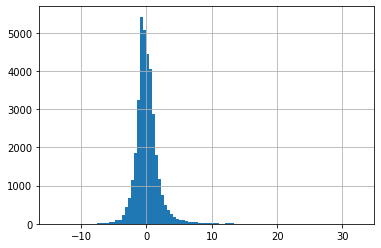

In [32]:
matrix.iloc[:, 0].hist(bins=100)

 ## Histogram of First Gene

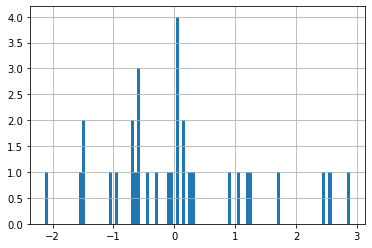

In [33]:
matrix.iloc[0, :].hist(bins=100)

 ## Save Filtered Matrix

In [34]:
uf.saveData(matrix, path, output_name + '_matrix_filtered', 
            ext='tsv', compression='gzip')

 # Analyze Data

 ## Create Gene List

In [35]:
gene_list = uf.createGeneList(matrix, geneid_lookup)
gene_list.head()

100%|██████████| 35577/35577 [00:00<00:00, 306731.86it/s]


GeneSym  GeneID
0      A1BG       1
1  A1BG-AS1  503538
2      A1CF   29974
3       A2M       2
4   A2M-AS1  144571

In [36]:
gene_list.shape

(35577, 2)

In [37]:
uf.saveData(gene_list, path, output_name + '_gene_list',
            ext='tsv', compression='gzip', index=False)

 ## Create Attribute List

In [38]:
attribute_list = uf.createAttributeList(matrix, metaData)
attribute_list.head()

NameError: name 'metaData' is not defined

In [39]:
attribute_list.shape

NameError: name 'attribute_list' is not defined

In [40]:
uf.saveData(attribute_list, path, output_name + '_attribute_list',
            ext='tsv', compression='gzip')

NameError: name 'attribute_list' is not defined

 ## Create matrix of Standardized values (values between -1, and 1)

In [41]:
standard_matrix = uf.createStandardizedMatrix(matrix)
standard_matrix.head()

100%|██████████| 35577/35577 [00:03<00:00, 11502.36it/s]


002040   

structure_name  white matter of forebrain, right_No Dementia_No TBI  \
index                                                                 
A1BG                                                     0.561176     
A1BG-AS1                                                 0.043321     
A1CF                                                    -0.518903     
A2M                                                     -0.139633     
A2M-AS1                                                  0.248272     

structure_name  white matter of forebrain, right_No Dementia_TBI  
index                                                             
A1BG                                                    0.874328  
A1BG-AS1                                                0.105784  
A1CF                                                   -0.581354  
A2M                                                    -0.202101  
A2M-AS1                                                 0.561176  

[5 rows x 32 columns]

In [42]:
uf.saveData(standard_matrix, path, output_name + '_standard_matrix',
            ext='tsv', compression='gzip')

 ## Plot of A Single Celltype, Normalized Value vs. Standardized Value

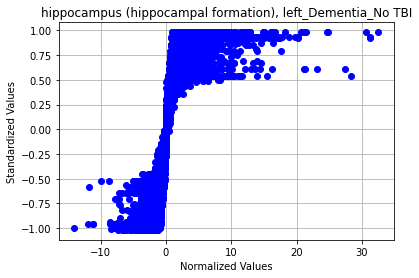

In [43]:
plt.plot(matrix[matrix.columns[0]],
         standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

 ## Create Ternary Matrix

In [44]:
ternary_matrix = uf.createTernaryMatrix(standard_matrix)
ternary_matrix.head()

0   

structure_name  white matter of forebrain, right_No Dementia_No TBI  \
index                                                                 
A1BG                                                            0     
A1BG-AS1                                                        0     
A1CF                                                            0     
A2M                                                             0     
A2M-AS1                                                         0     

structure_name  white matter of forebrain, right_No Dementia_TBI  
index                                                             
A1BG                                                           0  
A1BG-AS1                                                       0  
A1CF                                                           0  
A2M                                                            0  
A2M-AS1                                                        0  

[5 rows x 32 columns]

In [45]:
uf.saveData(ternary_matrix, path, output_name + '_ternary_matrix',
            ext='tsv', compression='gzip')

 ## Create Gene and Attribute Set Libraries

In [46]:
uf.createUpGeneSetLib(ternary_matrix, path, output_name + '_gene_up_set')

100%|██████████| 29/29 [00:00<00:00, 2176.99it/s]


In [47]:
uf.createDownGeneSetLib(ternary_matrix, path, output_name + '_gene_down_set')

100%|██████████| 27/27 [00:00<00:00, 1556.78it/s]


In [48]:
uf.createUpAttributeSetLib(ternary_matrix, path, 
                           output_name + '_attribute_up_set')

100%|██████████| 35577/35577 [00:01<00:00, 29661.47it/s]


In [49]:
uf.createDownAttributeSetLib(ternary_matrix, path, 
                             output_name + '_attribute_down_set')

100%|██████████| 35577/35577 [00:01<00:00, 29747.18it/s]


 ## Create Attribute Similarity Matrix

In [50]:
# attribute_similarity_matrix = uf.createSimilarityMatrix(matrix.T, 'cosine')
# attribute_similarity_matrix.head()

In [51]:
# uf.saveData(attribute_similarity_matrix, path,
#             output_name + '_attribute_similarity_matrix', 
#             ext='tsv', compression='gzip')

In [52]:
# net.load_df(attribute_similarity_matrix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
# net.cluster()
# net.widget()

 ## Create Gene Similarity Matrix

In [53]:
gene_similarity_matrix = uf.createSimilarityMatrix(matrix, 'cosine')
gene_similarity_matrix.head()

In [1]:
uf.saveData(gene_similarity_matrix, path, 
            output_name + '_gene_similarity_matrix',
            compression='npz', symmetric=True, dtype=np.float32)

NameError: name 'uf' is not defined

 ## Create Gene-Attribute Edge List

In [2]:
uf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, 
                               path, output_name + '_gene_attribute_edge_list')

NameError: name 'uf' is not defined

 # Create Downloadable Save File

In [3]:
uf.createArchive(path)

NameError: name 'uf' is not defined

 ### Link to download output files: [click here](./output_archive.zip)